In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from handler import build_dataset
from models import cnn_model, lstm_model, lstm_cnn_model, run_model
from tuning import create_study, get_optimized_parameters

2023-12-05 09:30:30.824355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/miniconda3/envs/fintech/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 0. Load Data Set

In [2]:
N_STEPS = 72
N_HORIZON = 24
N_FEATURES = 6
train_df, val_df, test_df = build_dataset(path='./src/rv_sentiment.csv', n_steps=N_STEPS, n_horizon=N_HORIZON)

Prediction lookback (n_steps): 72
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))


# 1. Hyperparameter Tuning

In [3]:
cnn_study = create_study(model_fun=cnn_model,
                         train=train_df,
                         val=val_df,
                         n_steps=N_STEPS,
                         n_horizon=N_HORIZON,
                         n_features=N_FEATURES)
lstm_study = create_study(model_fun=lstm_model,
                          train=train_df,
                          val=val_df,
                          n_steps=N_STEPS,
                          n_horizon=N_HORIZON,
                          n_features=N_FEATURES)
stacked_study = create_study(model_fun=lstm_cnn_model,
                             train=train_df,
                             val=val_df,
                             n_steps=N_STEPS,
                             n_horizon=N_HORIZON,
                             n_features=N_FEATURES)

/opt/miniconda3/envs/fintech/lib/python3.10/site-packages/optuna/samplers/_tpe/sampler.py:295: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2023-12-05 09:30:34,963] A new study created in RDB with name: no-name-8500913f-a78a-45e4-aef0-4c53f5a45383


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0679 - mae: 0.2963 - val_loss: 0.0301 - val_mae: 0.1760
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0473 - mae: 0.2444 - val_loss: 0.0274 - val_mae: 0.1627
Epoch 3/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0527 - mae: 0.2578 - val_loss: 0.0253 - val_mae: 0.1513
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0355 - mae: 0.2053 - val_loss: 0.0238 - val_mae: 0.1421
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0430 - mae: 0.2286 - val_loss: 0.0225 - val_mae: 0.1342
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0322 - mae: 0.1971 - val_loss: 0.0217 - val_mae: 0.1273
Epoch 7/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0320 - mae: 0.1963 - val_loss: 0.0211 - val_mae: 0.1235
Epoch 8/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0321 - mae: 0.1993

[I 2023-12-05 09:30:45,742] Trial 0 finished with value: 0.08586855977773666 and parameters: {'learning_rate': 0.00011964593156586885, 'weight_decay': 1.14361878517486e-05}. Best is trial 0 with value: 0.08586855977773666.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0763 - mae: 0.3147 - val_loss: 0.0258 - val_mae: 0.1334
Epoch 2/150
1/1 [==============================] - 0s 74ms/step - loss: 0.0449 - mae: 0.2445 - val_loss: 0.0251 - val_mae: 0.1361
Epoch 3/150
1/1 [==============================] - 0s 73ms/step - loss: 0.0341 - mae: 0.2115 - val_loss: 0.0257 - val_mae: 0.1417
Epoch 4/150
1/1 [==============================] - 0s 74ms/step - loss: 0.0363 - mae: 0.2186 - val_loss: 0.0254 - val_mae: 0.1375
Epoch 5/150
1/1 [==============================] - 0s 81ms/step - loss: 0.0245 - mae: 0.1765 - val_loss: 0.0256 - val_mae: 0.1390
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0213 - mae: 0.1623 - val_loss: 0.0252 - val_mae: 0.1373
Epoch 7/150
1/1 [==============================] - 0s 78ms/step - loss: 0.0234 - mae: 0.1715 - val_loss: 0.0242 - val_mae: 0.1331
Epoch 8/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0223 - mae: 0.1618

[I 2023-12-05 09:30:57,199] Trial 1 finished with value: 0.08882240206003189 and parameters: {'learning_rate': 0.0006612999981289683, 'weight_decay': 2.2659734039369565e-05}. Best is trial 0 with value: 0.08586855977773666.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0565 - mae: 0.2721 - val_loss: 0.0383 - val_mae: 0.1852
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0625 - mae: 0.2704 - val_loss: 0.0373 - val_mae: 0.1816
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0528 - mae: 0.2534 - val_loss: 0.0364 - val_mae: 0.1779
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0432 - mae: 0.2313 - val_loss: 0.0355 - val_mae: 0.1742
Epoch 5/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0458 - mae: 0.2289 - val_loss: 0.0346 - val_mae: 0.1706
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0499 - mae: 0.2485 - val_loss: 0.0337 - val_mae: 0.1671
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0503 - mae: 0.2477 - val_loss: 0.0329 - val_mae: 0.1638
Epoch 8/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0430 - mae: 0.2271

[I 2023-12-05 09:31:08,187] Trial 2 finished with value: 0.09001868218183517 and parameters: {'learning_rate': 3.5368899280940415e-05, 'weight_decay': 1.1459418867960801e-09}. Best is trial 0 with value: 0.08586855977773666.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0743 - mae: 0.3181 - val_loss: 0.0390 - val_mae: 0.2141
Epoch 2/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0388 - mae: 0.2200 - val_loss: 0.0270 - val_mae: 0.1627
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0254 - mae: 0.1790 - val_loss: 0.0204 - val_mae: 0.1193
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0123 - mae: 0.1251 - val_loss: 0.0203 - val_mae: 0.1091
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0111 - mae: 0.1144 - val_loss: 0.0214 - val_mae: 0.1034
Epoch 6/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0095 - mae: 0.1093 - val_loss: 0.0216 - val_mae: 0.0988
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0083 - mae: 0.0961 - val_loss: 0.0215 - val_mae: 0.0966
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0070 - mae: 0.0899

[I 2023-12-05 09:31:18,886] Trial 3 finished with value: 0.07329216599464417 and parameters: {'learning_rate': 0.0020810673148555303, 'weight_decay': 0.0006131795895763025}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0624 - mae: 0.2758 - val_loss: 0.0444 - val_mae: 0.2142
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0633 - mae: 0.2879 - val_loss: 0.0442 - val_mae: 0.2136
Epoch 3/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0547 - mae: 0.2637 - val_loss: 0.0440 - val_mae: 0.2129
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0695 - mae: 0.3066 - val_loss: 0.0438 - val_mae: 0.2122
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0595 - mae: 0.2752 - val_loss: 0.0436 - val_mae: 0.2115
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0692 - mae: 0.3026 - val_loss: 0.0434 - val_mae: 0.2108
Epoch 7/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0726 - mae: 0.2997 - val_loss: 0.0432 - val_mae: 0.2101
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0514 - mae: 0.2519

[I 2023-12-05 09:31:29,580] Trial 4 finished with value: 0.13778768479824066 and parameters: {'learning_rate': 4.28043769639752e-06, 'weight_decay': 7.257684125878767e-06}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0708 - mae: 0.2942 - val_loss: 0.0463 - val_mae: 0.2273
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0727 - mae: 0.3055 - val_loss: 0.0458 - val_mae: 0.2257
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0727 - mae: 0.2892 - val_loss: 0.0453 - val_mae: 0.2241
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0652 - mae: 0.2811 - val_loss: 0.0448 - val_mae: 0.2223
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0711 - mae: 0.2902 - val_loss: 0.0442 - val_mae: 0.2205
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0749 - mae: 0.2965 - val_loss: 0.0436 - val_mae: 0.2187
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0740 - mae: 0.2941 - val_loss: 0.0431 - val_mae: 0.2169
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0735 - mae: 0.2883

[I 2023-12-05 09:31:40,346] Trial 5 finished with value: 0.10462262481451035 and parameters: {'learning_rate': 1.0929284706409042e-05, 'weight_decay': 4.07092266472996e-09}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0641 - mae: 0.2851 - val_loss: 0.0250 - val_mae: 0.1272
Epoch 2/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0229 - mae: 0.1644 - val_loss: 0.0265 - val_mae: 0.1388
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0206 - mae: 0.1553 - val_loss: 0.0251 - val_mae: 0.1369
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0187 - mae: 0.1607 - val_loss: 0.0221 - val_mae: 0.1275
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0132 - mae: 0.1285 - val_loss: 0.0198 - val_mae: 0.1137
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0119 - mae: 0.1217 - val_loss: 0.0185 - val_mae: 0.1009
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0094 - mae: 0.1029 - val_loss: 0.0181 - val_mae: 0.0903
Epoch 8/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0075 - mae: 0.0954

[I 2023-12-05 09:31:50,918] Trial 6 finished with value: 0.08406682312488556 and parameters: {'learning_rate': 0.001034095268466443, 'weight_decay': 5.144853463284705e-07}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0622 - mae: 0.2823 - val_loss: 0.1714 - val_mae: 0.4562
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.2364 - mae: 0.5475 - val_loss: 0.0281 - val_mae: 0.1542
Epoch 3/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0207 - mae: 0.1576 - val_loss: 0.0229 - val_mae: 0.1100
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0088 - mae: 0.1033 - val_loss: 0.0217 - val_mae: 0.0984
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0082 - mae: 0.0947 - val_loss: 0.0199 - val_mae: 0.0903
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0062 - mae: 0.0802 - val_loss: 0.0182 - val_mae: 0.0874
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0053 - mae: 0.0746 - val_loss: 0.0169 - val_mae: 0.0887
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0052 - mae: 0.0761

[I 2023-12-05 09:32:01,649] Trial 7 finished with value: 0.08407308161258698 and parameters: {'learning_rate': 0.004901355830086318, 'weight_decay': 1.9281308696810606e-09}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0757 - mae: 0.3060 - val_loss: 0.3954 - val_mae: 0.7530
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.4299 - mae: 0.8027 - val_loss: 0.0389 - val_mae: 0.1665
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0324 - mae: 0.1835 - val_loss: 0.0222 - val_mae: 0.1089
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0123 - mae: 0.1186 - val_loss: 0.0208 - val_mae: 0.0994
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0103 - mae: 0.1098 - val_loss: 0.0197 - val_mae: 0.0915
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0080 - mae: 0.0914 - val_loss: 0.0191 - val_mae: 0.0850
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0063 - mae: 0.0793 - val_loss: 0.0191 - val_mae: 0.0820
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0055 - mae: 0.0735

[I 2023-12-05 09:32:12,491] Trial 8 finished with value: 0.09308356046676636 and parameters: {'learning_rate': 0.006416073308314046, 'weight_decay': 1.1145025493914503e-09}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1067 - mae: 0.3606 - val_loss: 0.0407 - val_mae: 0.2090
Epoch 2/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0569 - mae: 0.2642 - val_loss: 0.0225 - val_mae: 0.1471
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0256 - mae: 0.1854 - val_loss: 0.0208 - val_mae: 0.1038
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0113 - mae: 0.1211 - val_loss: 0.0244 - val_mae: 0.1169
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0111 - mae: 0.1154 - val_loss: 0.0252 - val_mae: 0.1177
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0103 - mae: 0.1094 - val_loss: 0.0240 - val_mae: 0.1089
Epoch 7/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0089 - mae: 0.0956 - val_loss: 0.0230 - val_mae: 0.1014
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0075 - mae: 0.0870

[I 2023-12-05 09:32:23,170] Trial 9 finished with value: 0.10229438543319702 and parameters: {'learning_rate': 0.0025983043327137715, 'weight_decay': 0.000816563074345258}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0424 - mae: 0.2304 - val_loss: 0.0280 - val_mae: 0.1492
Epoch 2/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0253 - mae: 0.1801 - val_loss: 0.0238 - val_mae: 0.1292
Epoch 3/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0172 - mae: 0.1469 - val_loss: 0.0208 - val_mae: 0.1118
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0118 - mae: 0.1226 - val_loss: 0.0190 - val_mae: 0.0931
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0102 - mae: 0.1159 - val_loss: 0.0189 - val_mae: 0.0845
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0065 - mae: 0.0856 - val_loss: 0.0193 - val_mae: 0.0839
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0052 - mae: 0.0729 - val_loss: 0.0196 - val_mae: 0.0862
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0059 - mae: 0.0763

[I 2023-12-05 09:32:33,877] Trial 10 finished with value: 0.08093073219060898 and parameters: {'learning_rate': 0.001565088898287893, 'weight_decay': 0.0049576950498849155}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1128 - mae: 0.3784 - val_loss: 0.1374 - val_mae: 0.4196
Epoch 2/150
1/1 [==============================] - 0s 48ms/step - loss: 0.1578 - mae: 0.4588 - val_loss: 0.0461 - val_mae: 0.2124
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0447 - mae: 0.2212 - val_loss: 0.0244 - val_mae: 0.1257
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0125 - mae: 0.1253 - val_loss: 0.0226 - val_mae: 0.1102
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0077 - mae: 0.0961 - val_loss: 0.0208 - val_mae: 0.1009
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0072 - mae: 0.0880 - val_loss: 0.0186 - val_mae: 0.0928
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0063 - mae: 0.0846 - val_loss: 0.0169 - val_mae: 0.0860
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0063 - mae: 0.0835

[I 2023-12-05 09:32:44,558] Trial 11 finished with value: 0.08801240473985672 and parameters: {'learning_rate': 0.0029504493300632068, 'weight_decay': 0.005335930388406917}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.0679 - mae: 0.2900 - val_loss: 0.0329 - val_mae: 0.1720
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0435 - mae: 0.2352 - val_loss: 0.0264 - val_mae: 0.1421
Epoch 3/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0388 - mae: 0.2158 - val_loss: 0.0226 - val_mae: 0.1190
Epoch 4/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0350 - mae: 0.2090 - val_loss: 0.0208 - val_mae: 0.1041
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0280 - mae: 0.1884 - val_loss: 0.0203 - val_mae: 0.1011
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0275 - mae: 0.1899 - val_loss: 0.0204 - val_mae: 0.1056
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0228 - mae: 0.1690 - val_loss: 0.0203 - val_mae: 0.1092
Epoch 8/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0235 - mae: 0.1671

[I 2023-12-05 09:32:55,731] Trial 12 finished with value: 0.08389885723590851 and parameters: {'learning_rate': 0.00030097439054198284, 'weight_decay': 0.0018520764603730437}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0804 - mae: 0.3214 - val_loss: 0.8139 - val_mae: 1.2129
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.8988 - mae: 1.3128 - val_loss: 0.1674 - val_mae: 0.4911
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.2069 - mae: 0.5386 - val_loss: 0.0242 - val_mae: 0.1094
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0090 - mae: 0.1013 - val_loss: 0.0239 - val_mae: 0.1069
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0082 - mae: 0.0943 - val_loss: 0.0233 - val_mae: 0.1038
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0078 - mae: 0.0897 - val_loss: 0.0224 - val_mae: 0.0988
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0070 - mae: 0.0827 - val_loss: 0.0213 - val_mae: 0.0927
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0062 - mae: 0.0759

[I 2023-12-05 09:33:06,715] Trial 13 finished with value: 0.08502590656280518 and parameters: {'learning_rate': 0.015437727974909846, 'weight_decay': 0.0003568367027791023}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0498 - mae: 0.2540 - val_loss: 0.0352 - val_mae: 0.1792
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0506 - mae: 0.2510 - val_loss: 0.0338 - val_mae: 0.1731
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0403 - mae: 0.2294 - val_loss: 0.0323 - val_mae: 0.1668
Epoch 4/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0525 - mae: 0.2565 - val_loss: 0.0309 - val_mae: 0.1603
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0414 - mae: 0.2398 - val_loss: 0.0296 - val_mae: 0.1540
Epoch 6/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0390 - mae: 0.2230 - val_loss: 0.0284 - val_mae: 0.1481
Epoch 7/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0396 - mae: 0.2227 - val_loss: 0.0274 - val_mae: 0.1429
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0330 - mae: 0.2073

[I 2023-12-05 09:33:17,454] Trial 14 finished with value: 0.09011959284543991 and parameters: {'learning_rate': 4.961773503653476e-05, 'weight_decay': 0.00331554694816902}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0531 - mae: 0.2668 - val_loss: 0.8050 - val_mae: 1.2333
Epoch 2/150
1/1 [==============================] - 0s 54ms/step - loss: 0.9236 - mae: 1.3623 - val_loss: 0.0294 - val_mae: 0.1712
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0235 - mae: 0.1732 - val_loss: 0.0256 - val_mae: 0.1478
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0176 - mae: 0.1496 - val_loss: 0.0226 - val_mae: 0.1137
Epoch 5/150
1/1 [==============================] - 0s 54ms/step - loss: 0.0112 - mae: 0.1124 - val_loss: 0.0212 - val_mae: 0.1008
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0071 - mae: 0.0900 - val_loss: 0.0210 - val_mae: 0.1033
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0069 - mae: 0.0908 - val_loss: 0.0189 - val_mae: 0.0880
Epoch 8/150
1/1 [==============================] - 0s 76ms/step - loss: 0.0058 - mae: 0.0762

[I 2023-12-05 09:33:28,447] Trial 15 finished with value: 0.07742629945278168 and parameters: {'learning_rate': 0.01033552600316748, 'weight_decay': 7.6087642875090054e-06}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0618 - mae: 0.2733 - val_loss: 0.1258 - val_mae: 0.3928
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.1908 - mae: 0.4992 - val_loss: 0.0225 - val_mae: 0.1217
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0157 - mae: 0.1378 - val_loss: 0.0232 - val_mae: 0.1120
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0099 - mae: 0.1044 - val_loss: 0.0206 - val_mae: 0.0931
Epoch 5/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0077 - mae: 0.0888 - val_loss: 0.0191 - val_mae: 0.0867
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0055 - mae: 0.0758 - val_loss: 0.0184 - val_mae: 0.0804
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0054 - mae: 0.0741 - val_loss: 0.0179 - val_mae: 0.0788
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0039 - mae: 0.0637

[I 2023-12-05 09:33:39,205] Trial 16 finished with value: 0.0840098112821579 and parameters: {'learning_rate': 0.006779873190458813, 'weight_decay': 7.490146846893542e-06}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0763 - mae: 0.3093 - val_loss: 0.4687 - val_mae: 0.8396
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.5298 - mae: 0.8999 - val_loss: 0.0687 - val_mae: 0.2891
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0578 - mae: 0.2768 - val_loss: 0.0245 - val_mae: 0.1152
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0086 - mae: 0.1027 - val_loss: 0.0200 - val_mae: 0.1008
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0059 - mae: 0.0824 - val_loss: 0.0171 - val_mae: 0.0988
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0055 - mae: 0.0814 - val_loss: 0.0195 - val_mae: 0.0892
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0058 - mae: 0.0799 - val_loss: 0.0191 - val_mae: 0.0885
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0050 - mae: 0.0726

[I 2023-12-05 09:33:49,882] Trial 17 finished with value: 0.0853387787938118 and parameters: {'learning_rate': 0.015215121833600909, 'weight_decay': 1.841531371496911e-05}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0989 - mae: 0.3458 - val_loss: 0.3259 - val_mae: 0.6540
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.3853 - mae: 0.7327 - val_loss: 0.0409 - val_mae: 0.2204
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0354 - mae: 0.2114 - val_loss: 0.0197 - val_mae: 0.1094
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0094 - mae: 0.1019 - val_loss: 0.0230 - val_mae: 0.1316
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0133 - mae: 0.1263 - val_loss: 0.0202 - val_mae: 0.1004
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0073 - mae: 0.0905 - val_loss: 0.0198 - val_mae: 0.1013
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0077 - mae: 0.0874 - val_loss: 0.0184 - val_mae: 0.0851
Epoch 8/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0048 - mae: 0.0654

[I 2023-12-05 09:34:00,565] Trial 18 finished with value: 0.08635930716991425 and parameters: {'learning_rate': 0.012221168533630927, 'weight_decay': 7.889049307857704e-07}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0841 - mae: 0.3181 - val_loss: 0.0294 - val_mae: 0.1549
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0364 - mae: 0.2211 - val_loss: 0.0239 - val_mae: 0.1261
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0312 - mae: 0.1943 - val_loss: 0.0253 - val_mae: 0.1411
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0298 - mae: 0.1986 - val_loss: 0.0262 - val_mae: 0.1482
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0277 - mae: 0.1923 - val_loss: 0.0248 - val_mae: 0.1416
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0219 - mae: 0.1707 - val_loss: 0.0230 - val_mae: 0.1324
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0188 - mae: 0.1551 - val_loss: 0.0218 - val_mae: 0.1236
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0170 - mae: 0.1468

[I 2023-12-05 09:34:11,368] Trial 19 finished with value: 0.09028071910142899 and parameters: {'learning_rate': 0.0007011515413406798, 'weight_decay': 1.8462499325035035e-05}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1053 - mae: 0.3628 - val_loss: 0.0628 - val_mae: 0.2581
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.1110 - mae: 0.3673 - val_loss: 0.0627 - val_mae: 0.2580
Epoch 3/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0861 - mae: 0.3307 - val_loss: 0.0627 - val_mae: 0.2579
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0852 - mae: 0.3342 - val_loss: 0.0627 - val_mae: 0.2578
Epoch 5/150
1/1 [==============================] - 0s 84ms/step - loss: 0.1100 - mae: 0.3778 - val_loss: 0.0626 - val_mae: 0.2577
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.1063 - mae: 0.3511 - val_loss: 0.0626 - val_mae: 0.2576
Epoch 7/150
1/1 [==============================] - 0s 50ms/step - loss: 0.1121 - mae: 0.3733 - val_loss: 0.0625 - val_mae: 0.2574
Epoch 8/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0956 - mae: 0.3408

[I 2023-12-05 09:34:22,232] Trial 20 finished with value: 0.24130910634994507 and parameters: {'learning_rate': 5.968499542001252e-07, 'weight_decay': 0.0036264558508236214}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0516 - mae: 0.2516 - val_loss: 0.0242 - val_mae: 0.1230
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0200 - mae: 0.1582 - val_loss: 0.0212 - val_mae: 0.1198
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0178 - mae: 0.1553 - val_loss: 0.0198 - val_mae: 0.1068
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0123 - mae: 0.1244 - val_loss: 0.0199 - val_mae: 0.0977
Epoch 5/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0090 - mae: 0.1084 - val_loss: 0.0206 - val_mae: 0.0946
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0066 - mae: 0.0881 - val_loss: 0.0214 - val_mae: 0.0949
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0062 - mae: 0.0846 - val_loss: 0.0218 - val_mae: 0.0937
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0058 - mae: 0.0798

[I 2023-12-05 09:34:33,101] Trial 21 finished with value: 0.08133960515260696 and parameters: {'learning_rate': 0.001290131162696981, 'weight_decay': 0.002184440556042048}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0706 - mae: 0.2968 - val_loss: 0.4724 - val_mae: 0.8743
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.6040 - mae: 1.0225 - val_loss: 0.0346 - val_mae: 0.1771
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.1880 - val_loss: 0.0241 - val_mae: 0.1227
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0120 - mae: 0.1204 - val_loss: 0.0216 - val_mae: 0.1030
Epoch 5/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0075 - mae: 0.0974 - val_loss: 0.0193 - val_mae: 0.0921
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0063 - mae: 0.0848 - val_loss: 0.0182 - val_mae: 0.0846
Epoch 7/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0057 - mae: 0.0759 - val_loss: 0.0187 - val_mae: 0.0859
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0052 - mae: 0.0707

[I 2023-12-05 09:34:43,867] Trial 22 finished with value: 0.08478368818759918 and parameters: {'learning_rate': 0.007195005360349126, 'weight_decay': 0.007362658734089777}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.1359 - mae: 0.4222 - val_loss: 0.0638 - val_mae: 0.2744
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.1077 - mae: 0.3700 - val_loss: 0.0602 - val_mae: 0.2662
Epoch 3/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0888 - mae: 0.3301 - val_loss: 0.0567 - val_mae: 0.2573
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0984 - mae: 0.3585 - val_loss: 0.0533 - val_mae: 0.2480
Epoch 5/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0932 - mae: 0.3491 - val_loss: 0.0501 - val_mae: 0.2386
Epoch 6/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0773 - mae: 0.3106 - val_loss: 0.0471 - val_mae: 0.2292
Epoch 7/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0769 - mae: 0.3085 - val_loss: 0.0442 - val_mae: 0.2200
Epoch 8/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0720 - mae: 0.3047

[I 2023-12-05 09:34:55,479] Trial 23 finished with value: 0.09347110986709595 and parameters: {'learning_rate': 3.905946130178398e-05, 'weight_decay': 0.00013702850497814004}. Best is trial 3 with value: 0.07329216599464417.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0877 - mae: 0.3187 - val_loss: 0.0447 - val_mae: 0.2217
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0547 - mae: 0.2648 - val_loss: 0.0331 - val_mae: 0.1829
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0459 - mae: 0.2473 - val_loss: 0.0270 - val_mae: 0.1513
Epoch 4/150
1/1 [==============================] - 0s 54ms/step - loss: 0.0389 - mae: 0.2152 - val_loss: 0.0243 - val_mae: 0.1332
Epoch 5/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0360 - mae: 0.2151 - val_loss: 0.0236 - val_mae: 0.1301
Epoch 6/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0304 - mae: 0.1959 - val_loss: 0.0237 - val_mae: 0.1304
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0314 - mae: 0.1992 - val_loss: 0.0240 - val_mae: 0.1306
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0296 - mae: 0.1966

[I 2023-12-05 09:35:06,598] Trial 24 finished with value: 0.09263557195663452 and parameters: {'learning_rate': 0.00031021409395484326, 'weight_decay': 1.9045653144947546e-08}. Best is trial 3 with value: 0.07329216599464417.
[I 2023-12-05 09:35:06,639] A new study created in RDB with name: no-name-93b92d85-edc8-4874-91d6-c54414ef2348


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0090 - mae: 0.1026 - val_loss: 0.0242 - val_mae: 0.1166
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0089 - mae: 0.1028 - val_loss: 0.0240 - val_mae: 0.1150
Epoch 3/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0086 - mae: 0.0987 - val_loss: 0.0238 - val_mae: 0.1135
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0083 - mae: 0.0980 - val_loss: 0.0236 - val_mae: 0.1120
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0084 - mae: 0.0976 - val_loss: 0.0233 - val_mae: 0.1105
Epoch 6/150
1/1 [==============================] - 0s 103ms/step - loss: 0.0081 - mae: 0.0954 - val_loss: 0.0231 - val_mae: 0.1089
Epoch 7/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0077 - mae: 0.0926 - val_loss: 0.0229 - val_mae: 0.1071
Epoch 8/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0077 - mae: 0.092

[I 2023-12-05 09:35:25,311] Trial 0 finished with value: 0.0744893029332161 and parameters: {'learning_rate': 0.0003264183501476943, 'weight_decay': 2.7989232480664057e-06}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0097 - mae: 0.1082 - val_loss: 0.0250 - val_mae: 0.1208
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0098 - mae: 0.1070 - val_loss: 0.0250 - val_mae: 0.1208
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0094 - mae: 0.1074 - val_loss: 0.0250 - val_mae: 0.1207
Epoch 4/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0096 - mae: 0.1060 - val_loss: 0.0250 - val_mae: 0.1207
Epoch 5/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0101 - mae: 0.1072 - val_loss: 0.0249 - val_mae: 0.1207
Epoch 6/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0091 - mae: 0.1023 - val_loss: 0.0249 - val_mae: 0.1207
Epoch 7/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0098 - mae: 0.1069 - val_loss: 0.0249 - val_mae: 0.1207
Epoch 8/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0094 - mae: 0.1050

[I 2023-12-05 09:35:43,881] Trial 1 finished with value: 0.11798563599586487 and parameters: {'learning_rate': 2.8086497476806e-06, 'weight_decay': 1.1362466592398505e-07}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1064 - val_loss: 0.0243 - val_mae: 0.1187
Epoch 2/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0098 - mae: 0.1070 - val_loss: 0.0243 - val_mae: 0.1187
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0094 - mae: 0.1049 - val_loss: 0.0242 - val_mae: 0.1187
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0096 - mae: 0.1035 - val_loss: 0.0242 - val_mae: 0.1187
Epoch 5/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0099 - mae: 0.1062 - val_loss: 0.0242 - val_mae: 0.1186
Epoch 6/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0100 - mae: 0.1058 - val_loss: 0.0242 - val_mae: 0.1186
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0098 - mae: 0.1067 - val_loss: 0.0242 - val_mae: 0.1186
Epoch 8/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0096 - mae: 0.1056

[I 2023-12-05 09:36:02,369] Trial 2 finished with value: 0.11442635953426361 and parameters: {'learning_rate': 5.066425145176763e-06, 'weight_decay': 0.0023890174222242363}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0092 - mae: 0.1042 - val_loss: 0.0819 - val_mae: 0.3541
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.1031 - mae: 0.3780 - val_loss: 0.0207 - val_mae: 0.0936
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0067 - mae: 0.0814 - val_loss: 0.0236 - val_mae: 0.1092
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0081 - mae: 0.0969 - val_loss: 0.0233 - val_mae: 0.1041
Epoch 5/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0074 - mae: 0.0908 - val_loss: 0.0221 - val_mae: 0.0947
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0063 - mae: 0.0790 - val_loss: 0.0205 - val_mae: 0.0913
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0054 - mae: 0.0733 - val_loss: 0.0192 - val_mae: 0.0932
Epoch 8/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0051 - mae: 0.0772

[I 2023-12-05 09:36:20,820] Trial 3 finished with value: 0.08517197519540787 and parameters: {'learning_rate': 0.024023614571229392, 'weight_decay': 3.743686992432697e-09}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0110 - mae: 0.1157 - val_loss: 0.0260 - val_mae: 0.1302
Epoch 2/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0111 - mae: 0.1179 - val_loss: 0.0260 - val_mae: 0.1301
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0114 - mae: 0.1211 - val_loss: 0.0260 - val_mae: 0.1301
Epoch 4/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0111 - mae: 0.1156 - val_loss: 0.0260 - val_mae: 0.1301
Epoch 5/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0115 - mae: 0.1214 - val_loss: 0.0260 - val_mae: 0.1301
Epoch 6/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0118 - mae: 0.1210 - val_loss: 0.0260 - val_mae: 0.1301
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0117 - mae: 0.1199 - val_loss: 0.0260 - val_mae: 0.1301
Epoch 8/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0113 - mae: 0.1176

[I 2023-12-05 09:36:40,035] Trial 4 finished with value: 0.1278599202632904 and parameters: {'learning_rate': 1.8132330219161598e-06, 'weight_decay': 0.004410165416048513}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0098 - mae: 0.1070 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 2/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0097 - mae: 0.1079 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 3/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0099 - mae: 0.1073 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0096 - mae: 0.1072 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 5/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0099 - mae: 0.1081 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0098 - mae: 0.1081 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0098 - mae: 0.1076 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 8/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0098 - mae: 0.1080

[I 2023-12-05 09:36:58,649] Trial 5 finished with value: 0.11982330679893494 and parameters: {'learning_rate': 4.491518324381263e-07, 'weight_decay': 2.9235515189362754e-06}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0089 - mae: 0.1005 - val_loss: 0.0232 - val_mae: 0.1129
Epoch 2/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0085 - mae: 0.0985 - val_loss: 0.0232 - val_mae: 0.1124
Epoch 3/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0084 - mae: 0.0973 - val_loss: 0.0231 - val_mae: 0.1119
Epoch 4/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0089 - mae: 0.1010 - val_loss: 0.0231 - val_mae: 0.1114
Epoch 5/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0088 - mae: 0.1015 - val_loss: 0.0230 - val_mae: 0.1109
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0082 - mae: 0.0979 - val_loss: 0.0230 - val_mae: 0.1104
Epoch 7/150
1/1 [==============================] - 0s 113ms/step - loss: 0.0082 - mae: 0.0947 - val_loss: 0.0229 - val_mae: 0.1099
Epoch 8/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0084 - mae: 0.096

[I 2023-12-05 09:37:17,334] Trial 6 finished with value: 0.07733727246522903 and parameters: {'learning_rate': 7.293664818899196e-05, 'weight_decay': 0.004092888573650144}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1005 - val_loss: 0.0212 - val_mae: 0.0909
Epoch 2/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0063 - mae: 0.0786 - val_loss: 0.0186 - val_mae: 0.0842
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0047 - mae: 0.0695 - val_loss: 0.0169 - val_mae: 0.0930
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0054 - mae: 0.0802 - val_loss: 0.0169 - val_mae: 0.0827
Epoch 5/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0039 - mae: 0.0660 - val_loss: 0.0171 - val_mae: 0.0799
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0038 - mae: 0.0620 - val_loss: 0.0172 - val_mae: 0.0796
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0039 - mae: 0.0629 - val_loss: 0.0171 - val_mae: 0.0819
Epoch 8/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0037 - mae: 0.0632

[I 2023-12-05 09:37:35,829] Trial 7 finished with value: 0.08339422196149826 and parameters: {'learning_rate': 0.007827988977219228, 'weight_decay': 0.0013969117271237447}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0101 - mae: 0.1092 - val_loss: 0.0252 - val_mae: 0.1209
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0096 - mae: 0.1075 - val_loss: 0.0249 - val_mae: 0.1196
Epoch 3/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0095 - mae: 0.1060 - val_loss: 0.0247 - val_mae: 0.1183
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0092 - mae: 0.1032 - val_loss: 0.0245 - val_mae: 0.1171
Epoch 5/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0093 - mae: 0.1027 - val_loss: 0.0243 - val_mae: 0.1159
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0085 - mae: 0.0998 - val_loss: 0.0241 - val_mae: 0.1147
Epoch 7/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0089 - mae: 0.1003 - val_loss: 0.0240 - val_mae: 0.1135
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0087 - mae: 0.0994

[I 2023-12-05 09:37:54,435] Trial 8 finished with value: 0.07821660488843918 and parameters: {'learning_rate': 0.00028329718427034834, 'weight_decay': 0.0016356097893293286}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0100 - mae: 0.1100 - val_loss: 0.0253 - val_mae: 0.1228
Epoch 2/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0101 - mae: 0.1116 - val_loss: 0.0253 - val_mae: 0.1228
Epoch 3/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0098 - mae: 0.1102 - val_loss: 0.0253 - val_mae: 0.1227
Epoch 4/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0099 - mae: 0.1094 - val_loss: 0.0253 - val_mae: 0.1227
Epoch 5/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0099 - mae: 0.1091 - val_loss: 0.0253 - val_mae: 0.1227
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0099 - mae: 0.1115 - val_loss: 0.0253 - val_mae: 0.1227
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0100 - mae: 0.1099 - val_loss: 0.0253 - val_mae: 0.1226
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0098 - mae: 0.1089

[I 2023-12-05 09:38:13,623] Trial 9 finished with value: 0.11869499832391739 and parameters: {'learning_rate': 5.381566757425559e-06, 'weight_decay': 0.004207337745827954}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0118 - mae: 0.1220 - val_loss: 0.0261 - val_mae: 0.1327
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0110 - mae: 0.1203 - val_loss: 0.0259 - val_mae: 0.1312
Epoch 3/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0117 - mae: 0.1223 - val_loss: 0.0256 - val_mae: 0.1297
Epoch 4/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0115 - mae: 0.1220 - val_loss: 0.0254 - val_mae: 0.1281
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0107 - mae: 0.1156 - val_loss: 0.0252 - val_mae: 0.1266
Epoch 6/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0105 - mae: 0.1155 - val_loss: 0.0250 - val_mae: 0.1252
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0098 - mae: 0.1101 - val_loss: 0.0248 - val_mae: 0.1238
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0098 - mae: 0.1099

[I 2023-12-05 09:38:32,217] Trial 10 finished with value: 0.07866042852401733 and parameters: {'learning_rate': 0.00019219700663581239, 'weight_decay': 1.1107285196588993e-06}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0095 - mae: 0.1082 - val_loss: 0.0250 - val_mae: 0.1224
Epoch 2/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0097 - mae: 0.1088 - val_loss: 0.0248 - val_mae: 0.1210
Epoch 3/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0092 - mae: 0.1026 - val_loss: 0.0246 - val_mae: 0.1195
Epoch 4/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0090 - mae: 0.1037 - val_loss: 0.0244 - val_mae: 0.1180
Epoch 5/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0090 - mae: 0.1032 - val_loss: 0.0242 - val_mae: 0.1166
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0088 - mae: 0.0998 - val_loss: 0.0240 - val_mae: 0.1151
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0090 - mae: 0.1014 - val_loss: 0.0238 - val_mae: 0.1137
Epoch 8/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0086 - mae: 0.1002

[I 2023-12-05 09:38:50,854] Trial 11 finished with value: 0.0793561264872551 and parameters: {'learning_rate': 0.0002610828750363698, 'weight_decay': 0.00012780337017771005}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0088 - mae: 0.1010 - val_loss: 0.0225 - val_mae: 0.1056
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0078 - mae: 0.0930 - val_loss: 0.0214 - val_mae: 0.0966
Epoch 3/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0066 - mae: 0.0836 - val_loss: 0.0200 - val_mae: 0.0879
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0062 - mae: 0.0787 - val_loss: 0.0186 - val_mae: 0.0829
Epoch 5/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0052 - mae: 0.0718 - val_loss: 0.0177 - val_mae: 0.0811
Epoch 6/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0049 - mae: 0.0699 - val_loss: 0.0171 - val_mae: 0.0808
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0047 - mae: 0.0714 - val_loss: 0.0168 - val_mae: 0.0819
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0042 - mae: 0.0661

[I 2023-12-05 09:39:09,408] Trial 12 finished with value: 0.09124823659658432 and parameters: {'learning_rate': 0.002080685798700524, 'weight_decay': 6.855343535906866e-06}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0089 - mae: 0.1025 - val_loss: 0.0240 - val_mae: 0.1163
Epoch 2/150
1/1 [==============================] - 0s 105ms/step - loss: 0.0089 - mae: 0.1013 - val_loss: 0.0240 - val_mae: 0.1162
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0089 - mae: 0.1031 - val_loss: 0.0240 - val_mae: 0.1160
Epoch 4/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0086 - mae: 0.1000 - val_loss: 0.0240 - val_mae: 0.1158
Epoch 5/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0089 - mae: 0.1021 - val_loss: 0.0239 - val_mae: 0.1156
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0086 - mae: 0.0994 - val_loss: 0.0239 - val_mae: 0.1155
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0088 - mae: 0.1018 - val_loss: 0.0239 - val_mae: 0.1153
Epoch 8/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0089 - mae: 0.101

[I 2023-12-05 09:39:27,994] Trial 13 finished with value: 0.08585833013057709 and parameters: {'learning_rate': 2.9990856785015154e-05, 'weight_decay': 1.4913001502053045e-05}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0105 - mae: 0.1117 - val_loss: 0.0249 - val_mae: 0.1210
Epoch 2/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0094 - mae: 0.1054 - val_loss: 0.0247 - val_mae: 0.1190
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0096 - mae: 0.1050 - val_loss: 0.0244 - val_mae: 0.1170
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0088 - mae: 0.1004 - val_loss: 0.0241 - val_mae: 0.1149
Epoch 5/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0088 - mae: 0.1000 - val_loss: 0.0238 - val_mae: 0.1128
Epoch 6/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0085 - mae: 0.0981 - val_loss: 0.0235 - val_mae: 0.1106
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0084 - mae: 0.0960 - val_loss: 0.0232 - val_mae: 0.1083
Epoch 8/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0081 - mae: 0.0941

[I 2023-12-05 09:39:46,622] Trial 14 finished with value: 0.07757825404405594 and parameters: {'learning_rate': 0.0005059987485953349, 'weight_decay': 9.358712883178077e-08}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0095 - mae: 0.1061 - val_loss: 0.0239 - val_mae: 0.1186
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0090 - mae: 0.1039 - val_loss: 0.0238 - val_mae: 0.1178
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0089 - mae: 0.1027 - val_loss: 0.0237 - val_mae: 0.1169
Epoch 4/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0087 - mae: 0.1010 - val_loss: 0.0236 - val_mae: 0.1159
Epoch 5/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0088 - mae: 0.1015 - val_loss: 0.0235 - val_mae: 0.1150
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0086 - mae: 0.0992 - val_loss: 0.0233 - val_mae: 0.1141
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0085 - mae: 0.0992 - val_loss: 0.0232 - val_mae: 0.1131
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0081 - mae: 0.0955

[I 2023-12-05 09:40:05,552] Trial 15 finished with value: 0.0767124816775322 and parameters: {'learning_rate': 0.00012751397783410004, 'weight_decay': 4.1526561383748546e-09}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0097 - mae: 0.1046 - val_loss: 0.0239 - val_mae: 0.1126
Epoch 2/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0096 - mae: 0.1048 - val_loss: 0.0239 - val_mae: 0.1124
Epoch 3/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0101 - mae: 0.1066 - val_loss: 0.0238 - val_mae: 0.1121
Epoch 4/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0095 - mae: 0.1037 - val_loss: 0.0238 - val_mae: 0.1119
Epoch 5/150
1/1 [==============================] - 0s 113ms/step - loss: 0.0099 - mae: 0.1054 - val_loss: 0.0238 - val_mae: 0.1117
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0095 - mae: 0.1032 - val_loss: 0.0237 - val_mae: 0.1115
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0102 - mae: 0.1085 - val_loss: 0.0237 - val_mae: 0.1113
Epoch 8/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0095 - mae: 0.104

[I 2023-12-05 09:40:24,826] Trial 16 finished with value: 0.09091577678918839 and parameters: {'learning_rate': 3.756538001455633e-05, 'weight_decay': 2.843608515996888e-09}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1105 - val_loss: 0.0247 - val_mae: 0.1225
Epoch 2/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0098 - mae: 0.1086 - val_loss: 0.0246 - val_mae: 0.1219
Epoch 3/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0094 - mae: 0.1065 - val_loss: 0.0245 - val_mae: 0.1213
Epoch 4/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0101 - mae: 0.1110 - val_loss: 0.0244 - val_mae: 0.1207
Epoch 5/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0093 - mae: 0.1044 - val_loss: 0.0243 - val_mae: 0.1201
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0096 - mae: 0.1080 - val_loss: 0.0242 - val_mae: 0.1195
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0094 - mae: 0.1049 - val_loss: 0.0242 - val_mae: 0.1188
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0093 - mae: 0.1047

[I 2023-12-05 09:40:43,580] Trial 17 finished with value: 0.07662992924451828 and parameters: {'learning_rate': 0.00010816240028235059, 'weight_decay': 1.4270070711038241e-09}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0106 - mae: 0.1103 - val_loss: 0.0249 - val_mae: 0.1213
Epoch 2/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0098 - mae: 0.1072 - val_loss: 0.0249 - val_mae: 0.1212
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0104 - mae: 0.1094 - val_loss: 0.0249 - val_mae: 0.1210
Epoch 4/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0103 - mae: 0.1079 - val_loss: 0.0248 - val_mae: 0.1208
Epoch 5/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0103 - mae: 0.1090 - val_loss: 0.0248 - val_mae: 0.1207
Epoch 6/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0109 - mae: 0.1120 - val_loss: 0.0248 - val_mae: 0.1205
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0106 - mae: 0.1108 - val_loss: 0.0248 - val_mae: 0.1203
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0107 - mae: 0.1096

[I 2023-12-05 09:41:02,280] Trial 18 finished with value: 0.1004272848367691 and parameters: {'learning_rate': 2.5836926531691035e-05, 'weight_decay': 2.3963054892342755e-07}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1048 - val_loss: 0.0239 - val_mae: 0.1135
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0097 - mae: 0.1040 - val_loss: 0.0236 - val_mae: 0.1113
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0089 - mae: 0.0992 - val_loss: 0.0234 - val_mae: 0.1092
Epoch 4/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0086 - mae: 0.0975 - val_loss: 0.0231 - val_mae: 0.1071
Epoch 5/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0083 - mae: 0.0928 - val_loss: 0.0228 - val_mae: 0.1049
Epoch 6/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0076 - mae: 0.0897 - val_loss: 0.0225 - val_mae: 0.1027
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0080 - mae: 0.0909 - val_loss: 0.0222 - val_mae: 0.1004
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0074 - mae: 0.0879

[I 2023-12-05 09:41:21,061] Trial 19 finished with value: 0.07719221711158752 and parameters: {'learning_rate': 0.00045917713650341075, 'weight_decay': 1.633315948070668e-09}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1043 - val_loss: 0.0206 - val_mae: 0.0868
Epoch 2/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0061 - mae: 0.0745 - val_loss: 0.0181 - val_mae: 0.0825
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0045 - mae: 0.0689 - val_loss: 0.0171 - val_mae: 0.0841
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0038 - mae: 0.0637 - val_loss: 0.0170 - val_mae: 0.0854
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0033 - mae: 0.0590 - val_loss: 0.0171 - val_mae: 0.0885
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0038 - mae: 0.0649 - val_loss: 0.0172 - val_mae: 0.0904
Epoch 7/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0038 - mae: 0.0662 - val_loss: 0.0173 - val_mae: 0.0913
Epoch 8/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0035 - mae: 0.0626

[I 2023-12-05 09:41:39,677] Trial 20 finished with value: 0.10482659190893173 and parameters: {'learning_rate': 0.008514462263594667, 'weight_decay': 8.615441419129163e-07}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0094 - mae: 0.1048 - val_loss: 0.0256 - val_mae: 0.1191
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0098 - mae: 0.1066 - val_loss: 0.0255 - val_mae: 0.1187
Epoch 3/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0091 - mae: 0.1030 - val_loss: 0.0255 - val_mae: 0.1182
Epoch 4/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0095 - mae: 0.1046 - val_loss: 0.0254 - val_mae: 0.1178
Epoch 5/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0097 - mae: 0.1054 - val_loss: 0.0253 - val_mae: 0.1173
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0092 - mae: 0.1034 - val_loss: 0.0252 - val_mae: 0.1169
Epoch 7/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0093 - mae: 0.1033 - val_loss: 0.0252 - val_mae: 0.1164
Epoch 8/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0090 - mae: 0.1023

[I 2023-12-05 09:41:58,211] Trial 21 finished with value: 0.07815568149089813 and parameters: {'learning_rate': 7.968540999444324e-05, 'weight_decay': 1.8347876003622134e-09}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1061 - val_loss: 0.0242 - val_mae: 0.1154
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0093 - mae: 0.1036 - val_loss: 0.0242 - val_mae: 0.1153
Epoch 3/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0100 - mae: 0.1074 - val_loss: 0.0242 - val_mae: 0.1153
Epoch 4/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0107 - mae: 0.1125 - val_loss: 0.0242 - val_mae: 0.1152
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0100 - mae: 0.1068 - val_loss: 0.0242 - val_mae: 0.1152
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0100 - mae: 0.1072 - val_loss: 0.0242 - val_mae: 0.1152
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0099 - mae: 0.1066 - val_loss: 0.0242 - val_mae: 0.1151
Epoch 8/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0101 - mae: 0.1073

[I 2023-12-05 09:42:16,960] Trial 22 finished with value: 0.10986430943012238 and parameters: {'learning_rate': 5.527615119756687e-06, 'weight_decay': 1.0111213373849174e-09}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0094 - mae: 0.1066 - val_loss: 0.0240 - val_mae: 0.1187
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0092 - mae: 0.1046 - val_loss: 0.0238 - val_mae: 0.1166
Epoch 3/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0089 - mae: 0.1008 - val_loss: 0.0235 - val_mae: 0.1145
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0085 - mae: 0.0990 - val_loss: 0.0232 - val_mae: 0.1124
Epoch 5/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0086 - mae: 0.0994 - val_loss: 0.0230 - val_mae: 0.1102
Epoch 6/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0081 - mae: 0.0941 - val_loss: 0.0227 - val_mae: 0.1079
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0080 - mae: 0.0930 - val_loss: 0.0224 - val_mae: 0.1054
Epoch 8/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0080 - mae: 0.0924

[I 2023-12-05 09:42:36,001] Trial 23 finished with value: 0.07843606173992157 and parameters: {'learning_rate': 0.0005810036430161862, 'weight_decay': 2.7611528612608203e-08}. Best is trial 0 with value: 0.0744893029332161.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0097 - mae: 0.1086 - val_loss: 0.0243 - val_mae: 0.1185
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0095 - mae: 0.1064 - val_loss: 0.0242 - val_mae: 0.1180
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0096 - mae: 0.1074 - val_loss: 0.0242 - val_mae: 0.1175
Epoch 4/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0096 - mae: 0.1066 - val_loss: 0.0241 - val_mae: 0.1169
Epoch 5/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0092 - mae: 0.1042 - val_loss: 0.0240 - val_mae: 0.1164
Epoch 6/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0090 - mae: 0.1044 - val_loss: 0.0240 - val_mae: 0.1159
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0096 - mae: 0.1047 - val_loss: 0.0239 - val_mae: 0.1154
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0093 - mae: 0.1044

[I 2023-12-05 09:42:55,532] Trial 24 finished with value: 0.07429321110248566 and parameters: {'learning_rate': 9.53308246804482e-05, 'weight_decay': 2.2151774334312568e-08}. Best is trial 24 with value: 0.07429321110248566.
[I 2023-12-05 09:42:55,572] A new study created in RDB with name: no-name-b165e45f-04b1-4a6d-9032-d1f87459bb15


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0094 - mae: 0.1051 - val_loss: 0.0240 - val_mae: 0.1160
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0096 - mae: 0.1047 - val_loss: 0.0237 - val_mae: 0.1134
Epoch 3/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0088 - mae: 0.1012 - val_loss: 0.0234 - val_mae: 0.1110
Epoch 4/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0085 - mae: 0.0977 - val_loss: 0.0231 - val_mae: 0.1087
Epoch 5/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0083 - mae: 0.0951 - val_loss: 0.0229 - val_mae: 0.1066
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0081 - mae: 0.0926 - val_loss: 0.0226 - val_mae: 0.1045
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0075 - mae: 0.0900 - val_loss: 0.0223 - val_mae: 0.1023
Epoch 8/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0074 - mae: 0.0903

[I 2023-12-05 09:43:10,233] Trial 0 finished with value: 0.0833246260881424 and parameters: {'learning_rate': 0.00030075697027188194, 'weight_decay': 7.263398644164309e-08}. Best is trial 0 with value: 0.0833246260881424.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0106 - mae: 0.1116 - val_loss: 0.0267 - val_mae: 0.1230
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0103 - mae: 0.1069 - val_loss: 0.0267 - val_mae: 0.1230
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0109 - mae: 0.1108 - val_loss: 0.0267 - val_mae: 0.1229
Epoch 4/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0106 - mae: 0.1119 - val_loss: 0.0267 - val_mae: 0.1229
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0109 - mae: 0.1104 - val_loss: 0.0267 - val_mae: 0.1228
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0111 - mae: 0.1105 - val_loss: 0.0267 - val_mae: 0.1228
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0112 - mae: 0.1125 - val_loss: 0.0267 - val_mae: 0.1227
Epoch 8/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0105 - mae: 0.1102

[I 2023-12-05 09:43:24,773] Trial 1 finished with value: 0.11559619009494781 and parameters: {'learning_rate': 4.284197666764374e-06, 'weight_decay': 0.000303493556391638}. Best is trial 0 with value: 0.0833246260881424.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0102 - mae: 0.1082 - val_loss: 0.0234 - val_mae: 0.1120
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0086 - mae: 0.0986 - val_loss: 0.0231 - val_mae: 0.1087
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0083 - mae: 0.0972 - val_loss: 0.0227 - val_mae: 0.1054
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0084 - mae: 0.0942 - val_loss: 0.0224 - val_mae: 0.1024
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0077 - mae: 0.0900 - val_loss: 0.0221 - val_mae: 0.0998
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0070 - mae: 0.0874 - val_loss: 0.0218 - val_mae: 0.0972
Epoch 7/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0075 - mae: 0.0894 - val_loss: 0.0215 - val_mae: 0.0951
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0066 - mae: 0.0822

[I 2023-12-05 09:43:39,328] Trial 2 finished with value: 0.09023559093475342 and parameters: {'learning_rate': 0.00027981652510657444, 'weight_decay': 3.2823866720836136e-08}. Best is trial 0 with value: 0.0833246260881424.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0098 - mae: 0.1063 - val_loss: 0.0239 - val_mae: 0.1203
Epoch 2/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0096 - mae: 0.1064 - val_loss: 0.0239 - val_mae: 0.1202
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0094 - mae: 0.1046 - val_loss: 0.0239 - val_mae: 0.1200
Epoch 4/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0097 - mae: 0.1063 - val_loss: 0.0239 - val_mae: 0.1199
Epoch 5/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0091 - mae: 0.1044 - val_loss: 0.0239 - val_mae: 0.1197
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0095 - mae: 0.1068 - val_loss: 0.0238 - val_mae: 0.1196
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0094 - mae: 0.1061 - val_loss: 0.0238 - val_mae: 0.1194
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0094 - mae: 0.1043

[I 2023-12-05 09:43:53,798] Trial 3 finished with value: 0.09814151376485825 and parameters: {'learning_rate': 1.465987973817285e-05, 'weight_decay': 4.929290764555151e-07}. Best is trial 0 with value: 0.0833246260881424.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0086 - mae: 0.0976 - val_loss: 0.0232 - val_mae: 0.1060
Epoch 2/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0083 - mae: 0.0954 - val_loss: 0.0229 - val_mae: 0.1033
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0077 - mae: 0.0895 - val_loss: 0.0226 - val_mae: 0.1008
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0075 - mae: 0.0891 - val_loss: 0.0223 - val_mae: 0.0984
Epoch 5/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0069 - mae: 0.0851 - val_loss: 0.0221 - val_mae: 0.0961
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0067 - mae: 0.0846 - val_loss: 0.0218 - val_mae: 0.0943
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0066 - mae: 0.0799 - val_loss: 0.0216 - val_mae: 0.0927
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0066 - mae: 0.0816

[I 2023-12-05 09:44:08,369] Trial 4 finished with value: 0.08132396638393402 and parameters: {'learning_rate': 0.00022635662555669326, 'weight_decay': 0.002444733492748874}. Best is trial 4 with value: 0.08132396638393402.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0100 - mae: 0.1086 - val_loss: 0.0255 - val_mae: 0.1491
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0163 - mae: 0.1419 - val_loss: 0.0200 - val_mae: 0.0873
Epoch 3/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0061 - mae: 0.0740 - val_loss: 0.0180 - val_mae: 0.0825
Epoch 4/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0049 - mae: 0.0690 - val_loss: 0.0163 - val_mae: 0.0890
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0050 - mae: 0.0759 - val_loss: 0.0163 - val_mae: 0.0891
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0041 - mae: 0.0695 - val_loss: 0.0166 - val_mae: 0.0898
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0041 - mae: 0.0683 - val_loss: 0.0169 - val_mae: 0.0920
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0039 - mae: 0.0685

[I 2023-12-05 09:44:22,917] Trial 5 finished with value: 0.09268965572118759 and parameters: {'learning_rate': 0.012684650819279603, 'weight_decay': 7.065688888637544e-06}. Best is trial 4 with value: 0.08132396638393402.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0090 - mae: 0.1027 - val_loss: 2.1295 - val_mae: 2.6130
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 2.8367 - mae: 3.3132 - val_loss: 0.0236 - val_mae: 0.1129
Epoch 3/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0092 - mae: 0.1042 - val_loss: 0.0254 - val_mae: 0.1274
Epoch 4/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0147 - mae: 0.1290 - val_loss: 0.0252 - val_mae: 0.1178
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0108 - mae: 0.1121 - val_loss: 0.0201 - val_mae: 0.0902
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0065 - mae: 0.0820 - val_loss: 0.0240 - val_mae: 0.1651
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0184 - mae: 0.1561 - val_loss: 0.0201 - val_mae: 0.1180
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0066 - mae: 0.0938

[I 2023-12-05 09:44:37,431] Trial 6 finished with value: 0.0817723199725151 and parameters: {'learning_rate': 0.023920893273295548, 'weight_decay': 0.0003439743322811436}. Best is trial 4 with value: 0.08132396638393402.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0108 - mae: 0.1174 - val_loss: 0.0242 - val_mae: 0.1230
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0103 - mae: 0.1131 - val_loss: 0.0240 - val_mae: 0.1215
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0105 - mae: 0.1118 - val_loss: 0.0238 - val_mae: 0.1200
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0101 - mae: 0.1101 - val_loss: 0.0236 - val_mae: 0.1185
Epoch 5/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0098 - mae: 0.1060 - val_loss: 0.0235 - val_mae: 0.1171
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0095 - mae: 0.1053 - val_loss: 0.0234 - val_mae: 0.1157
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0089 - mae: 0.1015 - val_loss: 0.0232 - val_mae: 0.1143
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0093 - mae: 0.1035

[I 2023-12-05 09:44:52,997] Trial 7 finished with value: 0.07697930932044983 and parameters: {'learning_rate': 0.0001353156461955834, 'weight_decay': 1.1362819900870463e-06}. Best is trial 7 with value: 0.07697930932044983.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1031 - val_loss: 0.0251 - val_mae: 0.1167
Epoch 2/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0089 - mae: 0.1016 - val_loss: 0.0250 - val_mae: 0.1159
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0090 - mae: 0.1024 - val_loss: 0.0248 - val_mae: 0.1151
Epoch 4/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0093 - mae: 0.1034 - val_loss: 0.0247 - val_mae: 0.1142
Epoch 5/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0087 - mae: 0.0989 - val_loss: 0.0245 - val_mae: 0.1134
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0087 - mae: 0.1000 - val_loss: 0.0244 - val_mae: 0.1126
Epoch 7/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0088 - mae: 0.0989 - val_loss: 0.0243 - val_mae: 0.1118
Epoch 8/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0084 - mae: 0.0966

[I 2023-12-05 09:45:07,744] Trial 8 finished with value: 0.07831127941608429 and parameters: {'learning_rate': 0.00010280170072454091, 'weight_decay': 3.8084257954048516e-07}. Best is trial 7 with value: 0.07697930932044983.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0087 - mae: 0.1000 - val_loss: 25.7131 - val_mae: 26.2131
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 23.3221 - mae: 23.8161 - val_loss: 0.0730 - val_mae: 0.2685
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0933 - mae: 0.3400 - val_loss: 0.0304 - val_mae: 0.1619
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0157 - mae: 0.1455 - val_loss: 0.0240 - val_mae: 0.1262
Epoch 5/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0107 - mae: 0.1148 - val_loss: 0.0185 - val_mae: 0.1037
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0083 - mae: 0.0986 - val_loss: 0.0177 - val_mae: 0.1145
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0088 - mae: 0.1061 - val_loss: 0.0177 - val_mae: 0.1177
Epoch 8/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0080 - mae: 0.

[I 2023-12-05 09:45:22,421] Trial 9 finished with value: 0.07931284606456757 and parameters: {'learning_rate': 0.02529087404861221, 'weight_decay': 2.1783509228033363e-07}. Best is trial 7 with value: 0.07697930932044983.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0082 - mae: 0.0976 - val_loss: 0.0232 - val_mae: 0.1088
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0083 - mae: 0.0949 - val_loss: 0.0232 - val_mae: 0.1088
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0084 - mae: 0.0967 - val_loss: 0.0232 - val_mae: 0.1088
Epoch 4/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0085 - mae: 0.0967 - val_loss: 0.0232 - val_mae: 0.1088
Epoch 5/150
1/1 [==============================] - 0s 74ms/step - loss: 0.0083 - mae: 0.0967 - val_loss: 0.0232 - val_mae: 0.1087
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0086 - mae: 0.0985 - val_loss: 0.0232 - val_mae: 0.1087
Epoch 7/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0083 - mae: 0.0946 - val_loss: 0.0232 - val_mae: 0.1087
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0083 - mae: 0.0953

[I 2023-12-05 09:45:36,923] Trial 10 finished with value: 0.10534623265266418 and parameters: {'learning_rate': 3.3595563412196834e-06, 'weight_decay': 4.035411872961367e-09}. Best is trial 7 with value: 0.07697930932044983.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0095 - mae: 0.1077 - val_loss: 0.0243 - val_mae: 0.1178
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0095 - mae: 0.1063 - val_loss: 0.0242 - val_mae: 0.1171
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0088 - mae: 0.1025 - val_loss: 0.0241 - val_mae: 0.1163
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0088 - mae: 0.1020 - val_loss: 0.0240 - val_mae: 0.1155
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0093 - mae: 0.1044 - val_loss: 0.0239 - val_mae: 0.1147
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0090 - mae: 0.1034 - val_loss: 0.0238 - val_mae: 0.1140
Epoch 7/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0091 - mae: 0.1028 - val_loss: 0.0236 - val_mae: 0.1132
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0089 - mae: 0.1032

[I 2023-12-05 09:45:51,407] Trial 11 finished with value: 0.076032355427742 and parameters: {'learning_rate': 7.299829255384803e-05, 'weight_decay': 1.6091561003023187e-06}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1058 - val_loss: 0.0241 - val_mae: 0.1184
Epoch 2/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0091 - mae: 0.1031 - val_loss: 0.0241 - val_mae: 0.1181
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0095 - mae: 0.1057 - val_loss: 0.0240 - val_mae: 0.1177
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0096 - mae: 0.1062 - val_loss: 0.0240 - val_mae: 0.1174
Epoch 5/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0093 - mae: 0.1034 - val_loss: 0.0239 - val_mae: 0.1170
Epoch 6/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0091 - mae: 0.1032 - val_loss: 0.0239 - val_mae: 0.1167
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0094 - mae: 0.1042 - val_loss: 0.0238 - val_mae: 0.1163
Epoch 8/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0092 - mae: 0.1033

[I 2023-12-05 09:46:06,030] Trial 12 finished with value: 0.07887998968362808 and parameters: {'learning_rate': 4.241015521951006e-05, 'weight_decay': 2.114426138777562e-05}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0094 - mae: 0.1052 - val_loss: 0.0245 - val_mae: 0.1151
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0092 - mae: 0.1029 - val_loss: 0.0242 - val_mae: 0.1130
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0088 - mae: 0.0995 - val_loss: 0.0240 - val_mae: 0.1111
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0085 - mae: 0.0982 - val_loss: 0.0237 - val_mae: 0.1092
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0080 - mae: 0.0934 - val_loss: 0.0235 - val_mae: 0.1073
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0082 - mae: 0.0944 - val_loss: 0.0232 - val_mae: 0.1054
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0076 - mae: 0.0902 - val_loss: 0.0230 - val_mae: 0.1036
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0075 - mae: 0.0891

[I 2023-12-05 09:46:20,784] Trial 13 finished with value: 0.08603313565254211 and parameters: {'learning_rate': 0.00022835386284539104, 'weight_decay': 8.079162776084182e-06}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0087 - mae: 0.0965 - val_loss: 0.0243 - val_mae: 0.1094
Epoch 2/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0087 - mae: 0.0979 - val_loss: 0.0243 - val_mae: 0.1094
Epoch 3/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0086 - mae: 0.0980 - val_loss: 0.0243 - val_mae: 0.1094
Epoch 4/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0088 - mae: 0.0991 - val_loss: 0.0243 - val_mae: 0.1094
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0085 - mae: 0.0967 - val_loss: 0.0243 - val_mae: 0.1094
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0085 - mae: 0.0981 - val_loss: 0.0243 - val_mae: 0.1094
Epoch 7/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0088 - mae: 0.0972 - val_loss: 0.0243 - val_mae: 0.1094
Epoch 8/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0089 - mae: 0.0987

[I 2023-12-05 09:46:35,426] Trial 14 finished with value: 0.10875514894723892 and parameters: {'learning_rate': 3.1644800639472844e-07, 'weight_decay': 1.1883819405483118e-05}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0089 - mae: 0.1019 - val_loss: 0.0204 - val_mae: 0.0943
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0068 - mae: 0.0849 - val_loss: 0.0187 - val_mae: 0.0842
Epoch 3/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0056 - mae: 0.0786 - val_loss: 0.0175 - val_mae: 0.0785
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0049 - mae: 0.0724 - val_loss: 0.0176 - val_mae: 0.0756
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0045 - mae: 0.0661 - val_loss: 0.0175 - val_mae: 0.0774
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0041 - mae: 0.0625 - val_loss: 0.0171 - val_mae: 0.0807
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0038 - mae: 0.0645 - val_loss: 0.0169 - val_mae: 0.0818
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0040 - mae: 0.0659

[I 2023-12-05 09:46:50,113] Trial 15 finished with value: 0.0896311104297638 and parameters: {'learning_rate': 0.0022772446356281607, 'weight_decay': 1.4482863492232255e-09}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0091 - mae: 0.1022 - val_loss: 0.0224 - val_mae: 0.1021
Epoch 2/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0082 - mae: 0.0912 - val_loss: 0.0215 - val_mae: 0.0953
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0072 - mae: 0.0851 - val_loss: 0.0205 - val_mae: 0.0882
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0066 - mae: 0.0801 - val_loss: 0.0196 - val_mae: 0.0824
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0060 - mae: 0.0760 - val_loss: 0.0187 - val_mae: 0.0796
Epoch 6/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0052 - mae: 0.0699 - val_loss: 0.0177 - val_mae: 0.0800
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0064 - mae: 0.0849 - val_loss: 0.0175 - val_mae: 0.0790
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0044 - mae: 0.0637

[I 2023-12-05 09:47:04,668] Trial 16 finished with value: 0.10237571597099304 and parameters: {'learning_rate': 0.000978058457033226, 'weight_decay': 2.794408213340807e-06}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0116 - mae: 0.1196 - val_loss: 0.0256 - val_mae: 0.1257
Epoch 2/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0112 - mae: 0.1167 - val_loss: 0.0256 - val_mae: 0.1255
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0110 - mae: 0.1175 - val_loss: 0.0256 - val_mae: 0.1254
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0112 - mae: 0.1161 - val_loss: 0.0256 - val_mae: 0.1253
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0117 - mae: 0.1194 - val_loss: 0.0255 - val_mae: 0.1251
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0105 - mae: 0.1157 - val_loss: 0.0255 - val_mae: 0.1250
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0109 - mae: 0.1176 - val_loss: 0.0255 - val_mae: 0.1248
Epoch 8/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0109 - mae: 0.1176

[I 2023-12-05 09:47:20,657] Trial 17 finished with value: 0.10494958609342575 and parameters: {'learning_rate': 1.1367983248070303e-05, 'weight_decay': 3.1797409145551354e-06}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0102 - mae: 0.1080 - val_loss: 0.0250 - val_mae: 0.1151
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0104 - mae: 0.1092 - val_loss: 0.0250 - val_mae: 0.1150
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0097 - mae: 0.1043 - val_loss: 0.0250 - val_mae: 0.1150
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0098 - mae: 0.1080 - val_loss: 0.0250 - val_mae: 0.1150
Epoch 5/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0101 - mae: 0.1061 - val_loss: 0.0250 - val_mae: 0.1150
Epoch 6/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0094 - mae: 0.1042 - val_loss: 0.0250 - val_mae: 0.1149
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0099 - mae: 0.1067 - val_loss: 0.0250 - val_mae: 0.1149
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0101 - mae: 0.1055

[I 2023-12-05 09:47:35,381] Trial 18 finished with value: 0.11142735183238983 and parameters: {'learning_rate': 2.7079355069701723e-06, 'weight_decay': 1.532289917982443e-07}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0117 - mae: 0.1200 - val_loss: 0.0269 - val_mae: 0.1328
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0113 - mae: 0.1194 - val_loss: 0.0269 - val_mae: 0.1327
Epoch 3/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0116 - mae: 0.1186 - val_loss: 0.0269 - val_mae: 0.1327
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0110 - mae: 0.1171 - val_loss: 0.0268 - val_mae: 0.1326
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0113 - mae: 0.1186 - val_loss: 0.0268 - val_mae: 0.1326
Epoch 6/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0108 - mae: 0.1146 - val_loss: 0.0268 - val_mae: 0.1325
Epoch 7/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0116 - mae: 0.1206 - val_loss: 0.0268 - val_mae: 0.1325
Epoch 8/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0111 - mae: 0.1187

[I 2023-12-05 09:47:50,012] Trial 19 finished with value: 0.1255246251821518 and parameters: {'learning_rate': 3.969261528532409e-06, 'weight_decay': 0.006682765634309023}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0091 - mae: 0.1037 - val_loss: 0.0232 - val_mae: 0.1125
Epoch 2/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0089 - mae: 0.1019 - val_loss: 0.0229 - val_mae: 0.1089
Epoch 3/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0085 - mae: 0.0976 - val_loss: 0.0225 - val_mae: 0.1052
Epoch 4/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0082 - mae: 0.0929 - val_loss: 0.0221 - val_mae: 0.1016
Epoch 5/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0072 - mae: 0.0886 - val_loss: 0.0216 - val_mae: 0.0977
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0074 - mae: 0.0868 - val_loss: 0.0211 - val_mae: 0.0938
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0069 - mae: 0.0832 - val_loss: 0.0205 - val_mae: 0.0901
Epoch 8/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0063 - mae: 0.0818

[I 2023-12-05 09:48:04,640] Trial 20 finished with value: 0.10122295469045639 and parameters: {'learning_rate': 0.0005074611704006582, 'weight_decay': 0.00017821336730939325}. Best is trial 11 with value: 0.076032355427742.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0090 - mae: 0.1016 - val_loss: 0.0238 - val_mae: 0.1154
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0090 - mae: 0.1011 - val_loss: 0.0237 - val_mae: 0.1148
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0091 - mae: 0.1014 - val_loss: 0.0236 - val_mae: 0.1142
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0088 - mae: 0.1006 - val_loss: 0.0236 - val_mae: 0.1135
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0084 - mae: 0.0971 - val_loss: 0.0235 - val_mae: 0.1128
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0090 - mae: 0.1002 - val_loss: 0.0234 - val_mae: 0.1121
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0085 - mae: 0.0989 - val_loss: 0.0234 - val_mae: 0.1114
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0084 - mae: 0.0986

[I 2023-12-05 09:48:19,249] Trial 21 finished with value: 0.07538589835166931 and parameters: {'learning_rate': 6.86345949649877e-05, 'weight_decay': 1.1193398900230798e-06}. Best is trial 21 with value: 0.07538589835166931.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1093 - val_loss: 0.0245 - val_mae: 0.1194
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0098 - mae: 0.1074 - val_loss: 0.0244 - val_mae: 0.1191
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0098 - mae: 0.1077 - val_loss: 0.0244 - val_mae: 0.1187
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0095 - mae: 0.1045 - val_loss: 0.0243 - val_mae: 0.1184
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0095 - mae: 0.1038 - val_loss: 0.0243 - val_mae: 0.1181
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0093 - mae: 0.1040 - val_loss: 0.0242 - val_mae: 0.1177
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0093 - mae: 0.1041 - val_loss: 0.0242 - val_mae: 0.1174
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0091 - mae: 0.1012

[I 2023-12-05 09:48:33,896] Trial 22 finished with value: 0.07953941822052002 and parameters: {'learning_rate': 4.801562911405928e-05, 'weight_decay': 2.261271882718787e-06}. Best is trial 21 with value: 0.07538589835166931.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1058 - val_loss: 0.0235 - val_mae: 0.1108
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0085 - mae: 0.0974 - val_loss: 0.0226 - val_mae: 0.1034
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0077 - mae: 0.0918 - val_loss: 0.0218 - val_mae: 0.0959
Epoch 4/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0074 - mae: 0.0865 - val_loss: 0.0211 - val_mae: 0.0897
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0066 - mae: 0.0799 - val_loss: 0.0204 - val_mae: 0.0851
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0063 - mae: 0.0765 - val_loss: 0.0197 - val_mae: 0.0824
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0053 - mae: 0.0712 - val_loss: 0.0190 - val_mae: 0.0805
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0053 - mae: 0.0733

[I 2023-12-05 09:48:48,503] Trial 23 finished with value: 0.08790098130702972 and parameters: {'learning_rate': 0.0007443516940647256, 'weight_decay': 4.823698529764882e-07}. Best is trial 21 with value: 0.07538589835166931.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1046 - val_loss: 0.0245 - val_mae: 0.1163
Epoch 2/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0097 - mae: 0.1054 - val_loss: 0.0244 - val_mae: 0.1161
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0097 - mae: 0.1061 - val_loss: 0.0244 - val_mae: 0.1159
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0097 - mae: 0.1072 - val_loss: 0.0244 - val_mae: 0.1157
Epoch 5/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0092 - mae: 0.1052 - val_loss: 0.0243 - val_mae: 0.1155
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0093 - mae: 0.1038 - val_loss: 0.0243 - val_mae: 0.1152
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0092 - mae: 0.1021 - val_loss: 0.0243 - val_mae: 0.1150
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0097 - mae: 0.1051

[I 2023-12-05 09:49:03,156] Trial 24 finished with value: 0.08989766240119934 and parameters: {'learning_rate': 2.589502797458983e-05, 'weight_decay': 1.4375305504229323e-08}. Best is trial 21 with value: 0.07538589835166931.


In [4]:
print('CNN Study Results')
cnn_params = get_optimized_parameters(cnn_study)
print('\nLSTM Study Results')
lstm_params = get_optimized_parameters(lstm_study)
print('\nLSTM-CNN Study Results')
stacked_params = get_optimized_parameters(stacked_study)

CNN Study Results
Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07329216599464417

LSTM Study Results


Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07429321110248566

LSTM-CNN Study Results
Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07538589835166931


In [5]:
model_configs = dict()
path = './src/rv_sentiment.csv'

## 1.1 Compile Models

### 1.1.1 CNN

In [6]:
cnn = cnn_model(cnn_params['learning_rate'], cnn_params['weight_decay'], n_steps=N_STEPS, n_horizon=N_HORIZON, n_features=N_FEATURES)
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 64)            2368      
                                                                 
 max_pooling1d (MaxPooling1  (None, 33, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dropout (Dropout)           (None, 960)               0       

### 1.1.2 LSTM

In [7]:
lstm = lstm_model(lstm_params['learning_rate'], lstm_params['weight_decay'], n_steps=N_STEPS, n_horizon=N_HORIZON, n_features=N_FEATURES)
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 72, 72)            22752     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 24)                3096   

### 1.1.3 LSTM-CNN

In [8]:
stacked = lstm_cnn_model(stacked_params['learning_rate'], stacked_params['weight_decay'], n_steps=N_STEPS, n_horizon=N_HORIZON, n_features=N_FEATURES)
stacked.summary()

Model: "lstm_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 64)            2368      
                                                                 
 max_pooling1d (MaxPooling1  (None, 33, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 15, 72)            39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                232

# 2. Train Optimized Models

In [9]:
print('--- Training CNN ---')
run_model(fname=path,
          model_name='CNN',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=cnn_params,
          n_steps=N_STEPS,
          n_horizon=N_HORIZON,
          n_features=N_FEATURES)
print('--- Training LSTM ---')
run_model(fname=path,
          model_name='LSTM',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=lstm_params,
          n_steps=N_STEPS,
          n_horizon=N_HORIZON,
          n_features=N_FEATURES)
print('--- Training LSTM-CNN ---')
run_model(fname=path,
          model_name='LSTM-CNN',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=stacked_params,
          n_steps=N_STEPS,
          n_horizon=N_HORIZON,
          n_features=N_FEATURES)

--- Training CNN ---
Prediction lookback (n_steps): 72
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0519 - mae: 0.2560 - val_loss: 0.0463 - val_mae: 0.2140
Epoch 2/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0559 - mae: 0.2540 - val_loss: 0.0238 - val_mae: 0.1405
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0216 - mae: 0.1616 - val_loss: 0.0183 - val_mae: 0.1088
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0119 - mae: 0.1183 - val_loss: 0.0181 - val_mae: 0.1014
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0082 - mae: 0.1013 - val_loss: 0.0183 - val_mae: 0.0970
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0068 - mae: 0.0872 - val_loss: 0.

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

# Evaluation of Training/Validation Results

Loss curves across the models are fairly stable. All models show a decreasing validation curve with different epoch thresholds for when the model stops learning against the validation set. The LSTM appears to begin to have the slowest learning curve, while the CNN takes around 20 epochs to reach a loss close to 0. Some options to help improve this are to introduce learning rate decline, or train on longer input sequences.

Plots of the MAE show a similar pattern to the loss plots.


Loss Curves


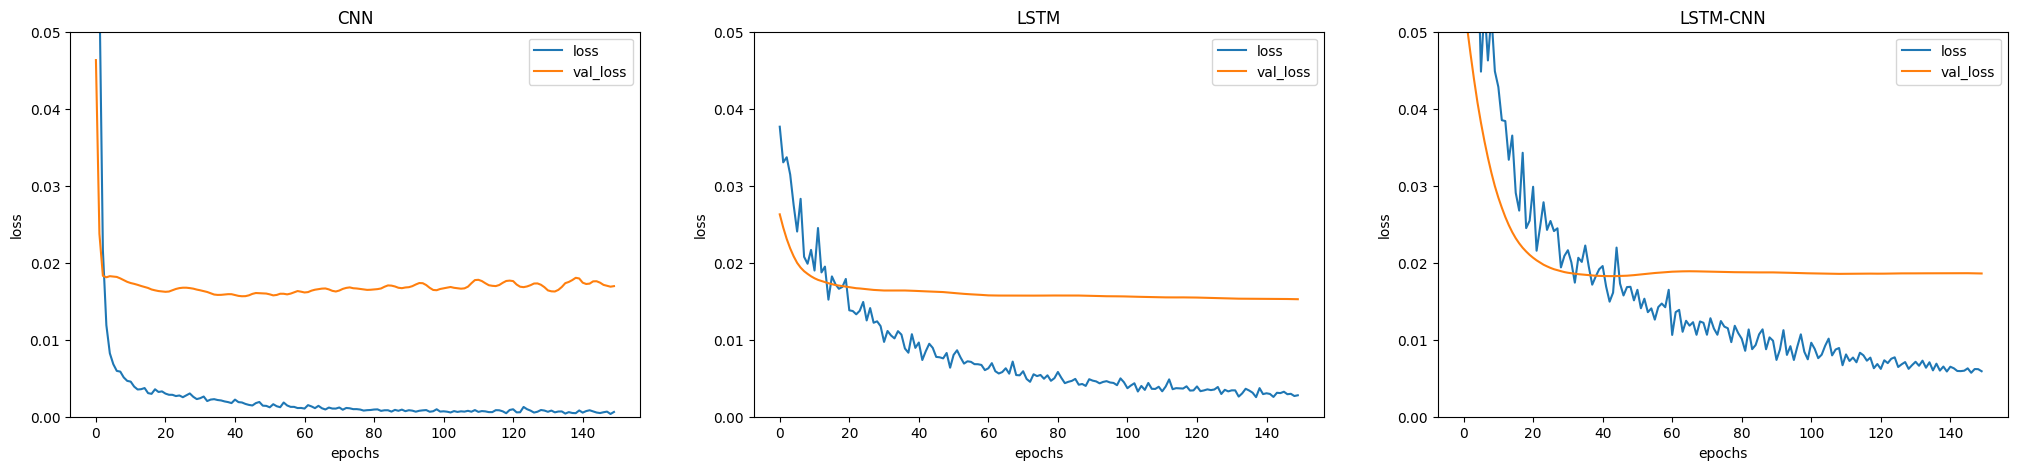

In [10]:
legend = list()

fig, axs = plt.subplots(1, 3, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    
    plot_graphs('loss', val, ax, 0.05)
print("Loss Curves")

MAE Curves


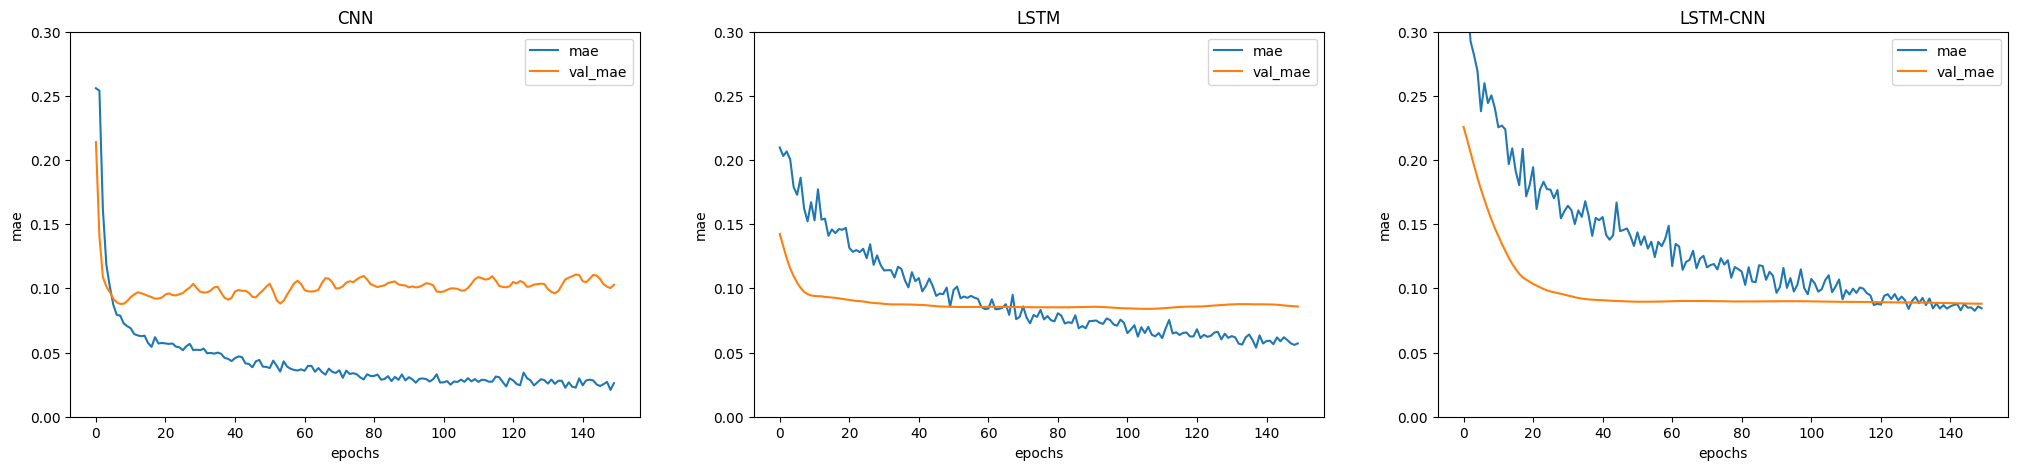

In [11]:
print("MAE Curves")
fig, axs = plt.subplots(1, 3, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mae', val, ax, 0.3)

# Evaluation of Test Results
It's surprising to see how well a CNN did. LSTM would be expected to perform well because of its ability to learn and remember longer trends in the data.

Putting the models' performance in perspective however the results show how with a limited lookback window, and simple features a lstm, and a cnn stacked with an lstm are a good starting choice for architecture.


In [12]:
names = list()
performance = list()

for key, value in model_configs.items():
    names.append(key)
    mae = value['model'].evaluate(value['test_ds'])
    performance.append(mae[1])
    
performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
performance_df

1/1 [==============================] - 0s 49ms/step - loss: 0.0025 - mae: 0.0574


,mae
CNN,0.097275
LSTM,0.083133
LSTM-CNN,0.057417


# Visualizing Predictions

Plot the actual and predicted 24 hour intervals. Below is the first 14 days of predictions. Interesting to note how the LSTM appears to oscilate over a longer frequency compared with the other models. The CNN also seems to capture the intra day oscillations (within the 24 hour period). Looking at the CNN stacked LSTM we can see how these two characteristics of the model's learning combine.

1/1 [==============================] - 0s 101ms/step


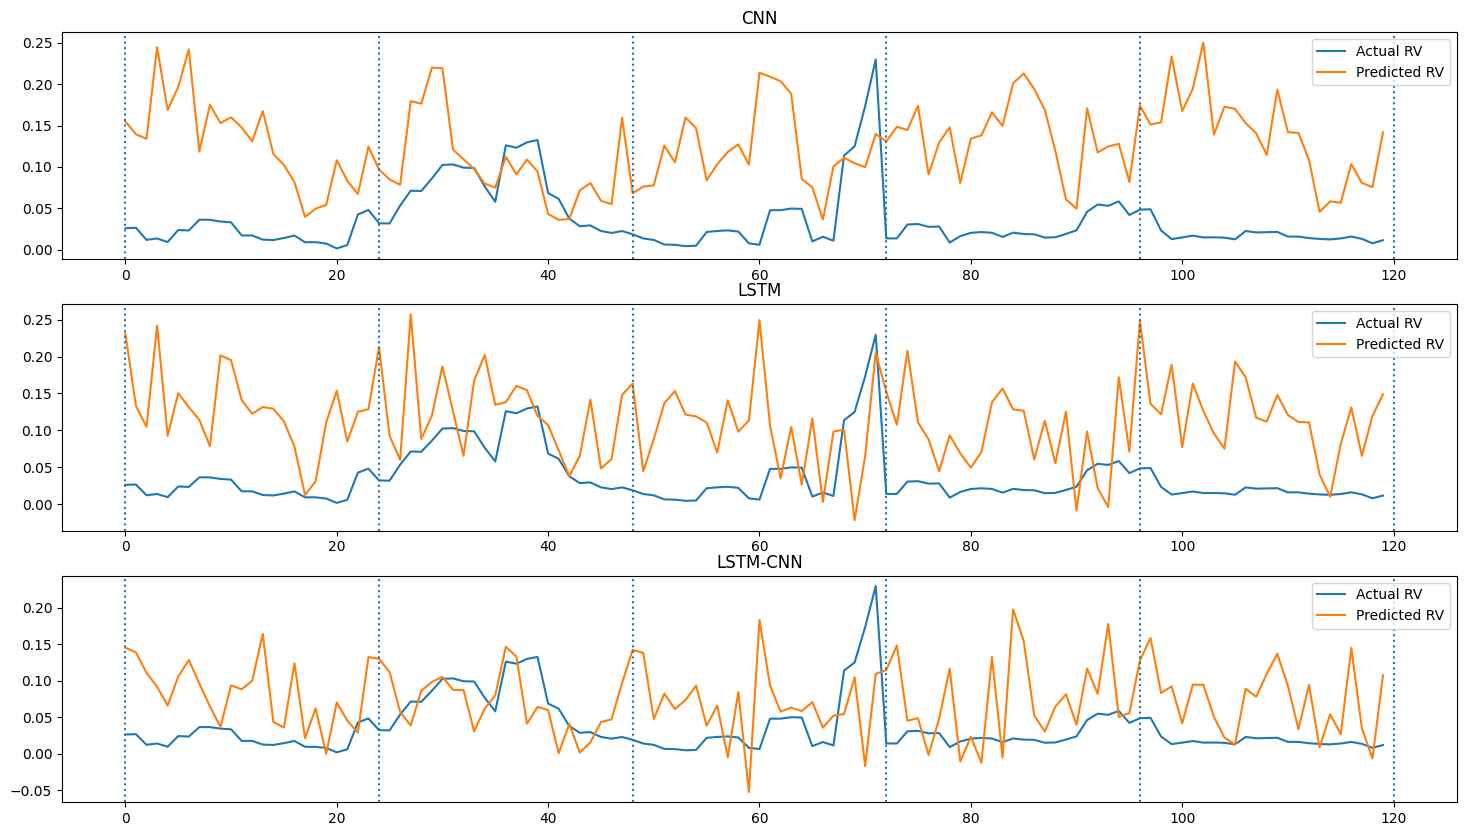

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(18, 10))
days = 5

vline = np.linspace(0, days*24, days+1)

for (key, val), ax in zip(model_configs.items(), axs):

    test = val['test_ds']
    preds = val['model'].predict(test)

    xbatch, ybatch = iter(test).get_next()

    ax.plot(ybatch.numpy()[:days].reshape(-1))
    ax.plot(preds[:days].reshape(-1))
    ax.set_title(key)
    ax.vlines(vline, ymin=0, ymax=1, linestyle='dotted', transform = ax.get_xaxis_transform())
    ax.legend(["Actual RV", "Predicted RV"])